In [35]:
import subprocess

# Run the MapReduce shell script
subprocess.run(["bash", "run_mapreduce.sh"])

Deleted /user/hadoop/output/hypo3_children


25/06/24 17:28:58 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.


packageJobJar: [mapper.py, reducer.py] [] /tmp/streamjob8022132412757899456.jar tmpDir=null


25/06/24 17:29:01 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
25/06/24 17:29:01 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
25/06/24 17:29:01 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
25/06/24 17:29:02 INFO mapred.FileInputFormat: Total input files to process : 1
25/06/24 17:29:02 INFO mapreduce.JobSubmitter: number of splits:9
25/06/24 17:29:03 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local503378718_0001
25/06/24 17:29:03 INFO mapred.LocalDistributedCacheManager: Localized file:/home/ubuntu/data-project/hypothesis3/mapper.py as file:/app/hadoop/tmp/mapred/local/1750778943269/mapper.py
25/06/24 17:29:04 INFO mapred.LocalDistributedCacheManager: Localized file:/home/ubuntu/data-project/hypothesis3/reducer.py as file:/app/hadoop/tmp/mapred/local/1750778943270/reducer.py
25/06/24 17:29:04 INFO mapreduce.Job: T

KeyboardInterrupt: 

In [25]:
!hdfs dfs -ls /user/hadoop/output/hypo3_children

Found 2 items
-rw-r--r--   1 ubuntu supergroup          0 2025-06-24 16:22 /user/hadoop/output/hypo3_children/_SUCCESS
-rw-r--r--   1 ubuntu supergroup         12 2025-06-24 16:22 /user/hadoop/output/hypo3_children/part-00000


In [26]:
!hdfs dfs -cat /user/hadoop/output/hypo3_children/part-00000

f	995
m	850


In [27]:
!hdfs dfs -cat /user/hadoop/data/okcupid_clean.csv | head -n 1


_id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,full_profile
cat: Unable to write to output stream.


In [29]:
# Get HDFS output
result = subprocess.run(
    ["hdfs", "dfs", "-cat", "/user/hadoop/output/hypo3_children/part-00000"],
    capture_output=True,
    text=True
)

# Parse output into dictionary
counts = {}
for line in result.stdout.strip().split("\n"):
    key, value = line.strip().split("\t")
    counts[key] = int(value)

print("Raw counts:", counts)

Raw counts: {'f': 995, 'm': 850}


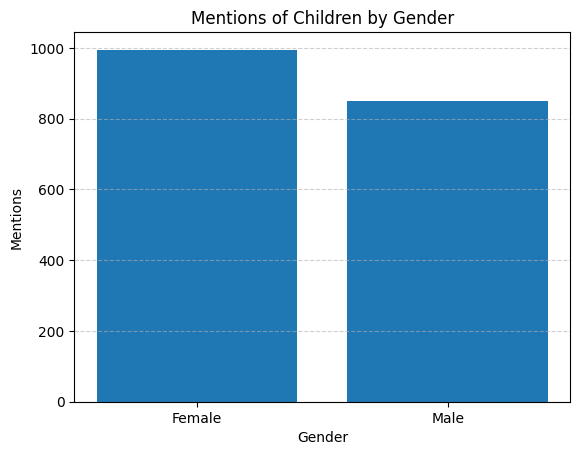

In [30]:
import matplotlib.pyplot as plt

# Data
labels = ['Female', 'Male']
values = [counts.get('f', 0), counts.get('m', 0)]

# Bar chart
plt.bar(labels, values)
plt.title("Mentions of Children by Gender")
plt.xlabel("Gender")
plt.ylabel("Mentions")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [33]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("CountGender").getOrCreate()

df = spark.read.csv("hdfs://localhost:54310/user/hadoop/data/okcupid_clean.csv", header=True, inferSchema=True)


total_females = df.filter(col("sex") == "f").count()
total_males = df.filter(col("sex") == "m").count()

print(f"Total females: {total_females}")
print(f"Total males: {total_males}")

female_ratio = counts.get('f', 0) / total_females
male_ratio = counts.get('m', 0) / total_males

[Stage 13:=============================================>            (7 + 2) / 9]

Total females: 120585
Total males: 179145


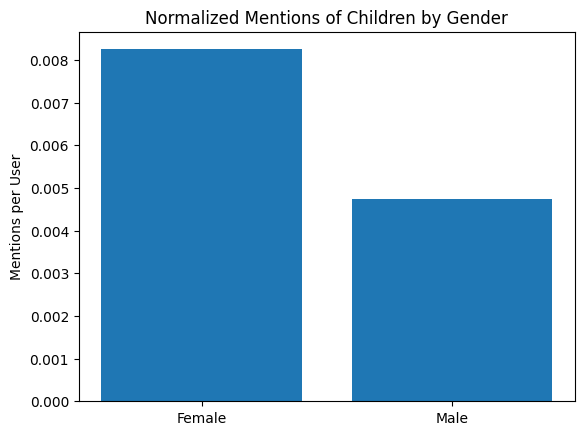

In [34]:
female_ratio = counts.get('f', 0) / total_females
male_ratio = counts.get('m', 0) / total_males

# Plot normalized ratios
plt.bar(['Female', 'Male'], [female_ratio, male_ratio])
plt.title("Normalized Mentions of Children by Gender")
plt.ylabel("Mentions per User")
plt.show()